In [122]:
import random
import sklearn
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import matplotlib.pyplot as plt

In [123]:
data_diesel = pd.read_csv('data/data_diesel_diff.csv', sep=',')
data_diesel = data_diesel.drop(['anio', 'mes'], axis=1)
data_diesel.head()

,diesel_diff
0,-76576.19
1,86033.88
2,-137814.26
3,114863.71
4,-54753.87


### Conjuntos de entrenamiento y prueba

In [124]:
scaler = StandardScaler()
data_diesel_scaled = scaler.fit_transform(data_diesel) 

In [125]:
# calculando los indices de particionamiento
entrenamiento = round(0.6 * len(data_diesel_scaled))
val_prueba = round(0.2 * len(data_diesel_scaled))

# Particionando los datos
train = data_diesel_scaled[:entrenamiento]
validation = data_diesel_scaled[entrenamiento:entrenamiento+val_prueba]
test = data_diesel_scaled[entrenamiento+val_prueba:]

train = np.insert(train, 0, 0)
train = train.reshape(-1, 1)

print(len(test))


53


In [126]:
def supervisada(serie,retrasos = 1):
    serie_x = []
    serie_y = []
    for i in range(len(serie)-retrasos):
        valor = serie[i:(i+retrasos),0]
        valor_sig = serie[i+retrasos,0]
        serie_x.append(valor)
        serie_y.append(valor_sig)
    return np.array(serie_x), np.array(serie_y)

x_train,y_train = supervisada(train)
x_val,y_val = supervisada(validation)
x_test,y_test = supervisada(test)

In [127]:
x_train = np.reshape(x_train,(x_train.shape[0],1,1))
x_val = np.reshape(x_val, (x_val.shape[0],1,1))
x_test = np.reshape(x_test, (x_test.shape[0],1,1))
len(x_val)

53

In [128]:
modelo1 = Sequential()
lote = 1
paso = 1
caracteristicas = 1
modelo1.add(LSTM(lote, batch_input_shape=(lote, paso, caracteristicas), stateful=True))
modelo1.add(Dense(1))
modelo1.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (1, 1)                    12        
                                                                 
 dense_10 (Dense)            (1, 1)                    2         
                                                                 
Total params: 14 (56.00 Byte)
Trainable params: 14 (56.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [129]:
modelo1.compile(loss='mean_squared_error',optimizer="rmsprop")

In [130]:
epocas = 1000
history= modelo1.fit(
    x = x_train,
    y = y_train,
    batch_size = lote,
    epochs = epocas,
    shuffle = False,
    validation_data = (x_val,y_val),
    verbose=1
)

Epoch 1/1000
161/161 [==============================] - 1s 2ms/step - loss: 1.0059 - val_loss: 1.2106
Epoch 2/1000
161/161 [==============================] - 0s 904us/step - loss: 0.9945 - val_loss: 1.2016
Epoch 3/1000
161/161 [==============================] - 0s 872us/step - loss: 0.9907 - val_loss: 1.1979
Epoch 4/1000
161/161 [==============================] - 0s 870us/step - loss: 0.9904 - val_loss: 1.1968
Epoch 5/1000
161/161 [==============================] - 0s 882us/step - loss: 0.9926 - val_loss: 1.1975
Epoch 6/1000
161/161 [==============================] - 0s 863us/step - loss: 0.9971 - val_loss: 1.1999
Epoch 7/1000
161/161 [==============================] - 0s 887us/step - loss: 1.0043 - val_loss: 1.2043
Epoch 8/1000
161/161 [==============================] - 0s 864us/step - loss: 1.0146 - val_loss: 1.2111
Epoch 9/1000
161/161 [==============================] - 0s 847us/step - loss: 1.0274 - val_loss: 1.2193
Epoch 10/1000
161/161 [==============================] - 0s 844us/

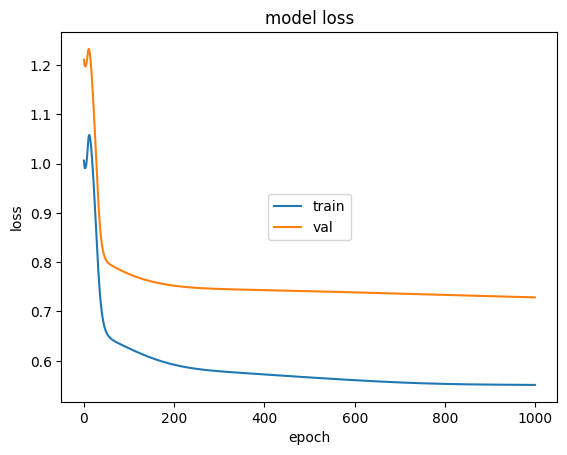

In [131]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='center')

In [132]:
print("Pérdida en Entrenamiento")
modelo1.evaluate(
    x = x_train,
    y = y_train,
    batch_size=1
)
print("Pérdida en Validación")
modelo1.evaluate(
    x = x_val,
    y = y_val,
    batch_size=1
)
print("Pérdida en Prueba")
modelo1.evaluate(
    x = x_test,
    y = y_test,
    batch_size=1
)

Pérdida en Entrenamiento
161/161 [==============================] - 0s 439us/step - loss: 0.5497
Pérdida en Validación
53/53 [==============================] - 0s 405us/step - loss: 0.7283
Pérdida en Prueba
52/52 [==============================] - 0s 413us/step - loss: 0.4975


0.49752333760261536